In [60]:
#import the libraries
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [61]:
#Load dataset from csv
df = pd.read_csv("C:\\Users\\dani_klarisa\\Desktop\\hotels-vienna.csv")
df

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,...,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Austria,Vienna,2.0,City centre,Donauturm,Wieden,109,Vienna,3.0,3.0,...,50%-75% offer,2017,11,0,0,1.5,3.8,Apartment,1,5.0
424,Austria,Vienna,145.0,City centre,Donauturm,Wieden,185,Vienna,5.0,4.0,...,15-50% offer,2017,11,0,0,0.8,3.6,Hotel,1,4.3
425,Austria,Vienna,112.0,City centre,Donauturm,Wieden,100,Vienna,4.0,4.5,...,0% no offer,2017,11,0,0,1.0,3.7,Hotel,1,4.4
426,Austria,Vienna,169.0,City centre,Donauturm,Wieden,58,Vienna,3.0,3.0,...,15-50% offer,2017,11,0,0,1.4,4.1,Hotel,1,3.2


In [62]:


# Create a defaultdict to store cities
city_dict = defaultdict(list)

# Iterate through the city_actual column in the dataframe
for city in df.city_actual:
    
    # Get the first letter of the city name and convert it to uppercase
    first_letter = city[0].upper()
    
    # Append the city name to the list of cities with the same first letter
    city_dict[first_letter].append(city)

# Convert the defaultdict to a regular dictionary
city_dict = dict(city_dict)

# Print the final city dictionary
print(city_dict)



{'V': ['Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vienna', 'Vi

In [63]:

# Clean the data
df.replace('NA', np.nan, inplace=True)
df[['rating_count', 'price', 'stars', 'ratingta', 'rating']] = df[['rating_count', 'price', 'stars', 'ratingta', 'rating']].astype(float)
df.drop(columns=['city_actual', 'center1label', 'center2label', 'neighbourhood', 'hotel_id', 'offer', 'offer_cat', 'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter', 'accommodation_type', 'nnights'], inplace=True)


In [64]:
# Filter the data
df = df.loc[df['city'] == 'Vienna']
df = df[['rating_count', 'price']]


In [65]:

# Create transformations of variables
df['log_rating_count'] = np.log(df['rating_count'])
df

,rating_count,price,log_rating_count
0,36.0,81.0,3.583519
1,189.0,81.0,5.241747
2,53.0,85.0,3.970292
3,55.0,83.0,4.007333
4,33.0,82.0,3.496508
...,...,...,...
423,2.0,109.0,0.693147
424,145.0,185.0,4.976734
425,112.0,100.0,4.718499
426,169.0,58.0,5.129899


In [66]:
df.describe()

,rating_count,price,log_rating_count
count,393.000000,428.000000,393.000000
mean,155.048346,131.366822,4.164203
std,191.217435,91.580545,1.632619
min,1.000000,27.000000,0.000000
25%,27.000000,83.000000,3.295837
50%,84.000000,109.500000,4.430817
75%,203.000000,146.000000,5.313206
max,1541.000000,1012.000000,7.340187


In [28]:

# Save the cleaned and transformed data to a new file
df.to_csv('data/vienna_hotels.csv', index=False)

In [29]:
df = df.replace([np.inf, -np.inf], np.nan)  # replace infinite values with NaN
df = df.dropna()  # remove rows with missing values or NaN
# Run an ordinary least squares regression
X = sm.add_constant(df['log_rating_count'])
model = sm.OLS(df['price'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.881
Date:                Fri, 07 Apr 2023   Prob (F-statistic):              0.171
Time:                        15:17:43   Log-Likelihood:                -2324.4
No. Observations:                 393   AIC:                             4653.
Df Residuals:                     391   BIC:                             4661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              143.5318     12.430  

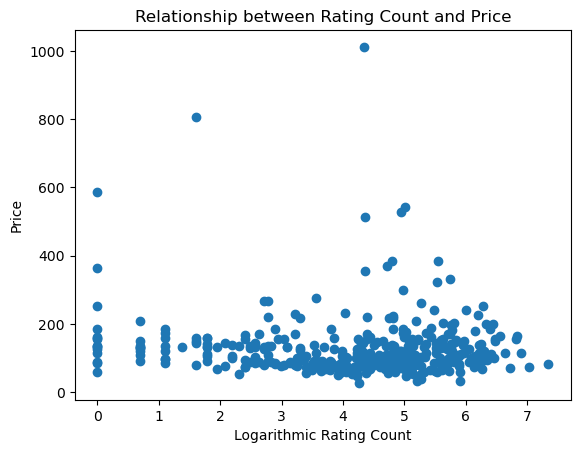

In [30]:
# Create a scatter plot of the relationship between the logarithmic transformation of rating count and price
plt.scatter(df['log_rating_count'], df['price'])
plt.xlabel('Logarithmic Rating Count')
plt.ylabel('Price')
plt.title('Relationship between Rating Count and Price')
plt.savefig('C:\\Users\\dani_klarisa\\Desktop\\rating_count_vs_price.png')


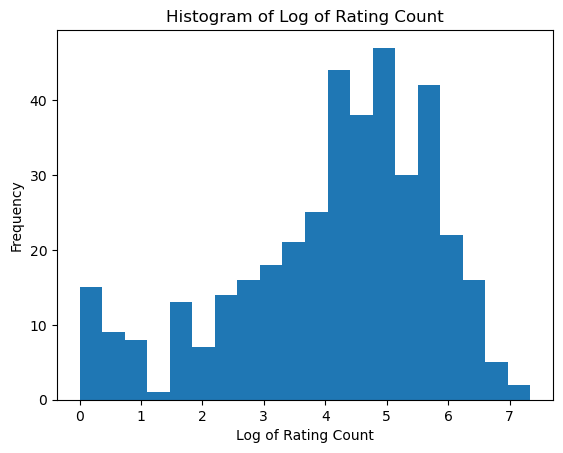

In [45]:
plt.hist(df['log_rating_count'], bins=20)
plt.xlabel('Log of Rating Count')
plt.ylabel('Frequency')
plt.title('Histogram of Log of Rating Count')
plt.show()


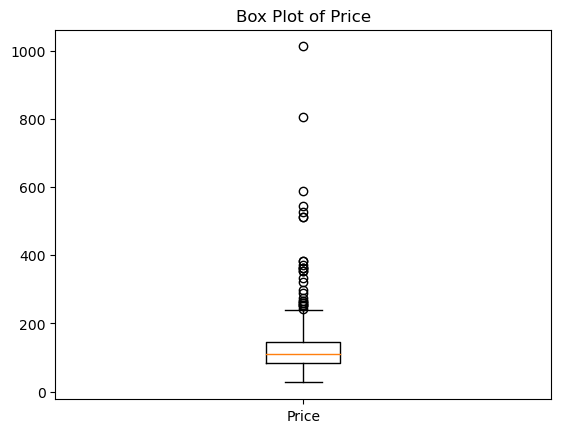

In [46]:
plt.boxplot([df['price']], labels=['Price'])
plt.title('Box Plot of Price')
plt.show()


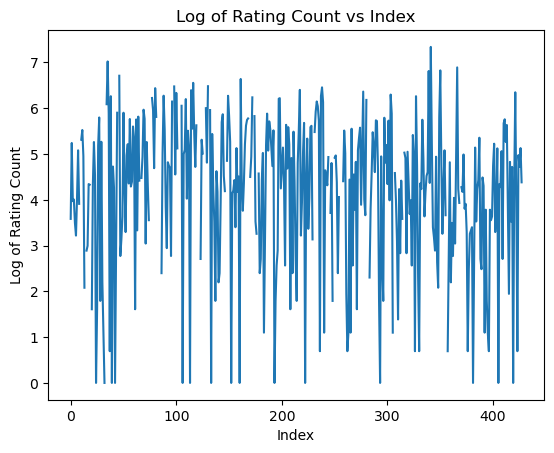

In [47]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['log_rating_count'])
plt.xlabel('Index')
plt.ylabel('Log of Rating Count')
plt.title('Log of Rating Count vs Index')
plt.show()
